# Compare strain composition of builds

Compare strain names and annotations between builds from October 2019 and February 2021.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [74]:
sns.set_style("ticks")

In [23]:
early_df = pd.read_csv(
    "flu_builds_2019-10-25/auspice_tables/flu_seasonal_h3n2_ha_21y_global.tsv",
    sep="\t",
    parse_dates=["date"]
)

In [24]:
late_df = pd.read_csv(
    "auspice_tables/flu_seasonal_h3n2_ha_21y_global.tsv",
    sep="\t",
    parse_dates=["date"]
)

In [25]:
early_df.shape

(10848, 19)

In [26]:
late_df.shape

(10979, 25)

In [12]:
early_df.head()

,name,date,num_date,ep,ep_seasonal,ne,ne_seasonal,rb,rb_seasonal,stem,stem_seasonal,cTiter,cTiterSub,cTiterSub_seasonal,region,country,SigPep,HA1,HA2
0,A/Guangzhou/98/2000,2000-02-13,2000.12,1,1,0,0,0,0,0,0,0.00,0.0,0.30,china,china,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...
1,A/Dakar/26/2001,2001-06-12,2001.45,5,5,2,2,0,0,3,3,0.07,0.0,0.60,africa,senegal,MKTIIALSYILCLVFA,QKLPGNDNSKATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQNS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...
2,A/Daegu/58/2001,2001-03-06,2001.18,1,1,2,1,0,0,1,1,0.07,0.0,0.09,japan_korea,south_korea,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...
3,A/Malaysia/12974/1997,1997-06-23,1997.48,1,1,3,3,0,0,2,2,0.07,0.0,0.22,southeast_asia,malaysia,MKTIIALSYILCLIFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...
4,A/Indonesia/8338/2001,2001-04-03,2001.26,4,3,2,2,0,0,3,1,0.07,0.0,0.00,southeast_asia,indonesia,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,GIFGAIAGFRENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...


In [13]:
late_df.head()

,name,date,num_date,ep,ep_seasonal,ne,ne_seasonal,rb,rb_seasonal,stem,...,cTiterSub_seasonal,cTiter_seasonal_vaccine_northern-hemisphere,cTiterSub_seasonal_vaccine_northern-hemisphere,region,country,SigPep,HA1,HA2,vaccine_strain_for_cTiter_seasonal_vaccine_northern-hemisphere,vaccine_strain_for_cTiterSub_seasonal_vaccine_northern-hemisphere
0,A/NewYork/597/1997,1997-01-06,1997.02,1,1,0,0,0,0,1,...,0.0,1.76,2.96,north_america,usa,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQGS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...,A/Wuhan/359/1995-egg,A/Wuhan/359/1995-egg
1,A/Shantou/133/1998,1998-06-21,1998.47,2,2,0,0,0,0,0,...,0.0,1.76,2.96,china,china,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...,A/Wuhan/359/1995-egg,A/Wuhan/359/1995-egg
2,A/Beijing/65/1997,1997-01-15,1997.04,1,1,0,0,0,0,0,...,0.0,1.76,2.96,china,china,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...,A/Wuhan/359/1995-egg,A/Wuhan/359/1995-egg
3,A/Harbin/1/1997,1997-01-07,1997.02,2,2,0,0,0,0,0,...,0.0,1.76,2.74,china,china,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...,A/Wuhan/359/1995-egg,A/Wuhan/359/1995-egg
4,A/Harbin/2/1997,1997-01-06,1997.02,4,4,1,1,1,1,1,...,0.0,1.76,2.74,china,china,MKTIIALSYILCLVFA,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNTTELVQSS...,GIFGAIAGFIENGWEGMVDGWYGFRHQNSEGTGQAADLKSTQAAIN...,A/Wuhan/359/1995-egg,A/Wuhan/359/1995-egg


In [16]:
early_strains = set(early_df["name"].values)

In [17]:
late_strains = set(late_df["name"].values)

In [18]:
len(early_strains & late_strains)

7596

In [19]:
len(early_strains)

10848

In [20]:
len(late_strains)

10979

In [21]:
len(early_strains & late_strains) / len(early_strains)

0.7002212389380531

In [88]:
early_strains_df = early_df.loc[:, ["name", "date", "cTiterSub", "cTiter"]].copy()

In [89]:
late_strains_df = late_df.loc[:, ["name", "date", "cTiterSub", "cTiter"]].copy()

In [90]:
all_strains_df = early_strains_df.merge(
    late_strains_df,
    on="name",
    how="outer",
    suffixes=["_early", "_late"],
    indicator=True
)

In [91]:
all_strains_df.head()

,name,date_early,cTiterSub_early,cTiter_early,date_late,cTiterSub_late,cTiter_late,_merge
0,A/Guangzhou/98/2000,2000-02-13,0.0,0.00,2000-02-13,2.77,2.28,both
1,A/Dakar/26/2001,2001-06-12,0.0,0.07,2001-06-12,2.99,2.34,both
2,A/Daegu/58/2001,2001-03-06,0.0,0.07,2001-03-06,2.77,2.34,both
3,A/Malaysia/12974/1997,1997-06-23,0.0,0.07,1997-06-24,2.77,2.27,both
4,A/Indonesia/8338/2001,2001-04-03,0.0,0.07,2001-04-04,2.77,2.27,both


In [92]:
all_strains_df.tail()

,name,date_early,cTiterSub_early,cTiter_early,date_late,cTiterSub_late,cTiter_late,_merge
14226,A/BurkinaFaso/1295/2019,NaT,NaN,NaN,2019-08-29,11.09,11.58,right_only
14227,A/Nigeria/3952/2019,NaT,NaN,NaN,2019-06-27,11.09,11.58,right_only
14228,A/CoteDIvoire/1705/2019,NaT,NaN,NaN,2019-08-23,11.17,11.58,right_only
14229,A/BurkinaFaso/2612/2019,NaT,NaN,NaN,2019-09-12,11.09,11.58,right_only
14230,A/BurkinaFaso/1298/2019,NaT,NaN,NaN,2019-09-10,11.09,11.58,right_only


In [93]:
all_strains_df["_merge"].value_counts()

both          7596
right_only    3383
left_only     3252
Name: _merge, dtype: int64

In [94]:
bins = pd.date_range("1994-01-01", "2020-01-01", freq="YS")

In [95]:
bins

DatetimeIndex(['1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

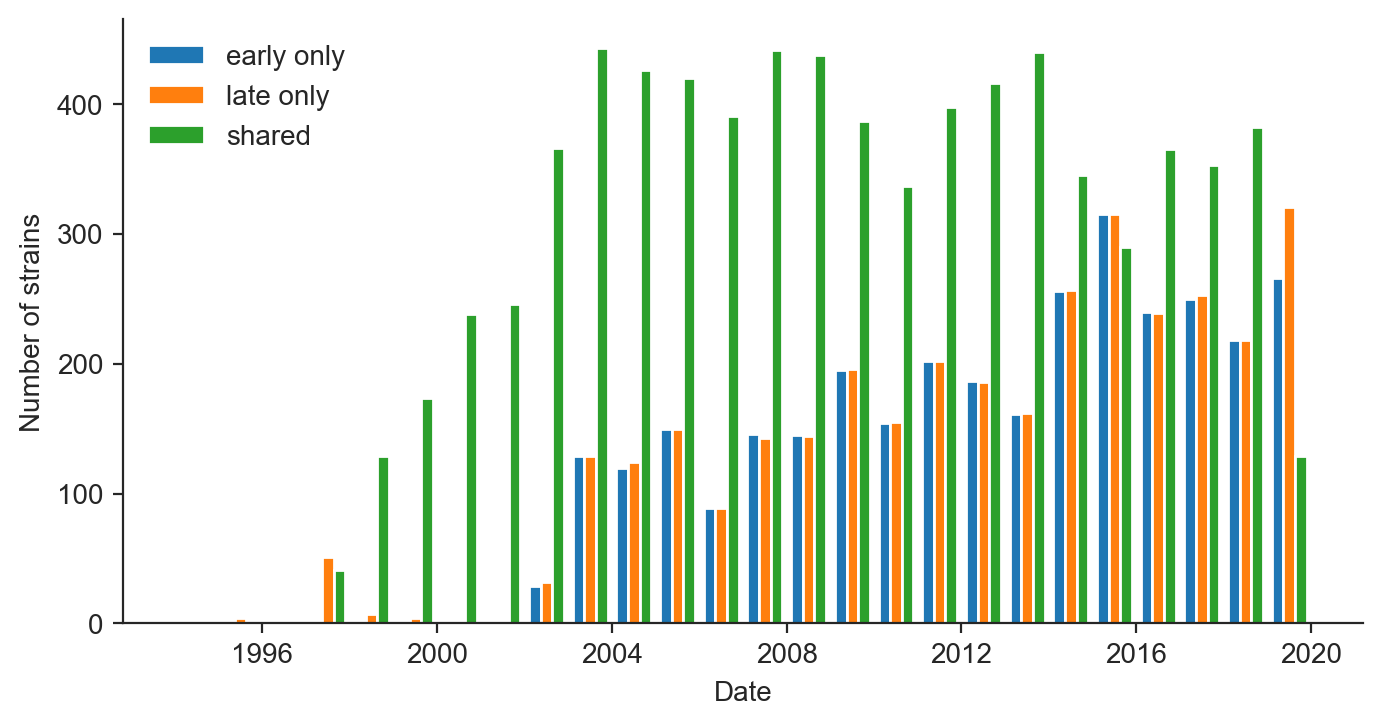

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)
ax.hist(
    [
        all_strains_df.query("_merge == 'left_only'")["date_early"],
        all_strains_df.query("_merge == 'right_only'")["date_late"],
        all_strains_df.query("_merge == 'both'")["date_early"],
    ],
    label=["early only", "late only", "shared"],
    bins=bins
)

ax.set_xlabel("Date")
ax.set_ylabel("Number of strains")

ax.legend(frameon=False)
sns.despine()

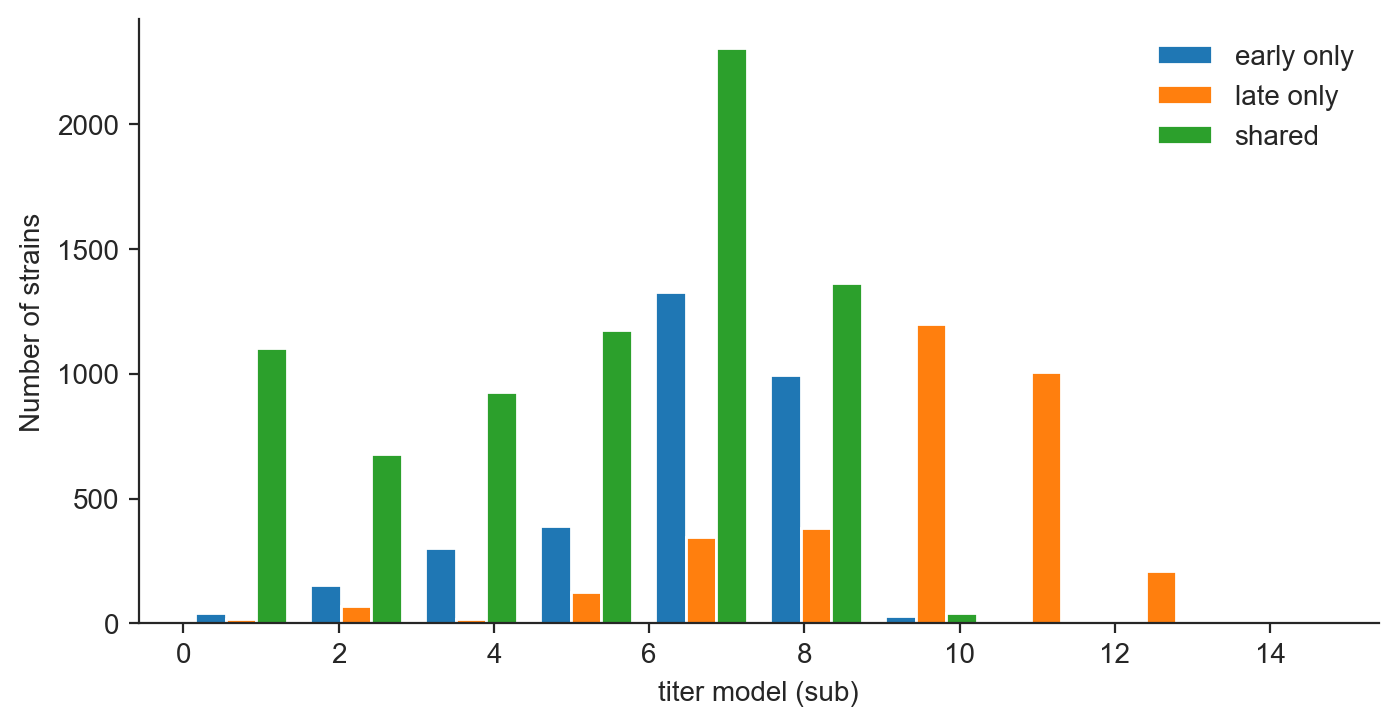

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)
ax.hist(
    [
        all_strains_df.query("_merge == 'left_only'")["cTiterSub_early"],
        all_strains_df.query("_merge == 'right_only'")["cTiterSub_late"],
        all_strains_df.query("_merge == 'both'")["cTiterSub_early"],
    ],
    label=["early only", "late only", "shared"]
)

ax.set_xlabel("titer model (sub)")
ax.set_ylabel("Number of strains")

ax.legend(frameon=False)
sns.despine()

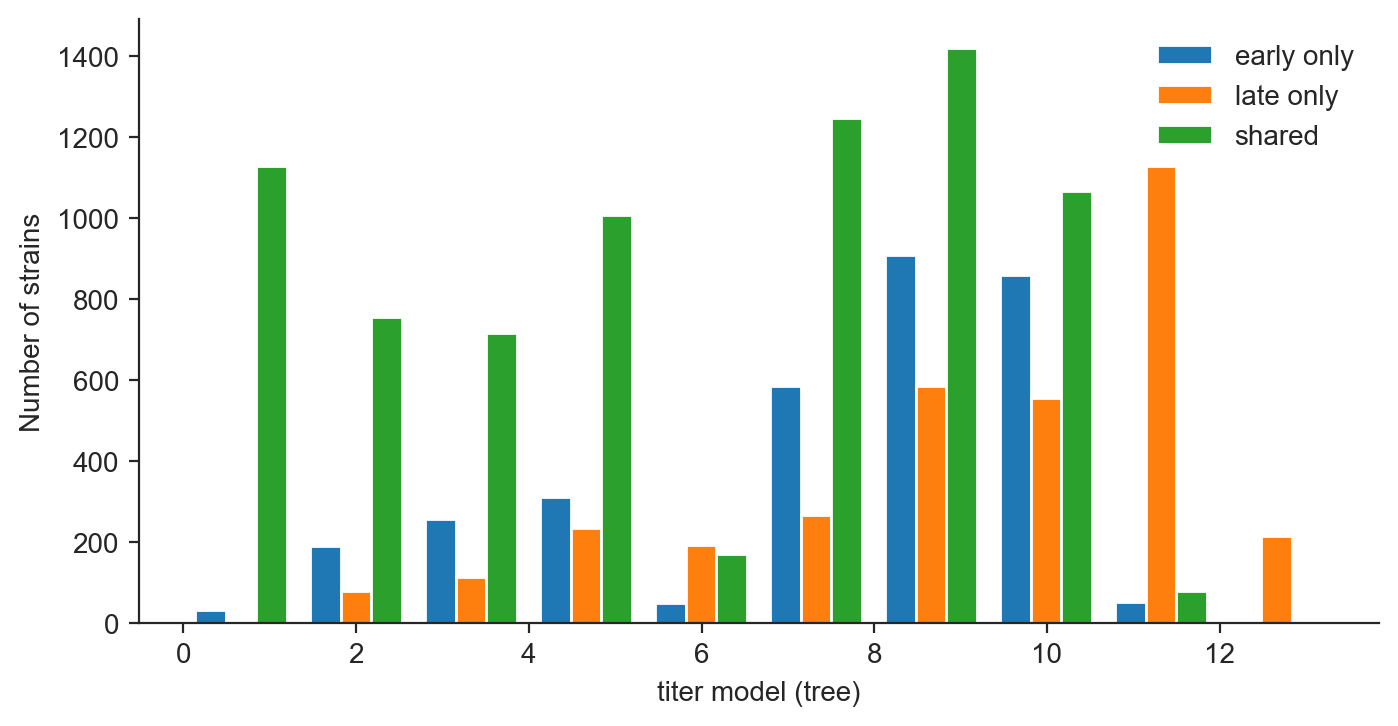

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)
ax.hist(
    [
        all_strains_df.query("_merge == 'left_only'")["cTiter_early"],
        all_strains_df.query("_merge == 'right_only'")["cTiter_late"],
        all_strains_df.query("_merge == 'both'")["cTiter_early"],
    ],
    label=["early only", "late only", "shared"]
)

ax.set_xlabel("titer model (tree)")
ax.set_ylabel("Number of strains")

ax.legend(frameon=False)
sns.despine()

In [99]:
import random

In [101]:
np.random.random()

0.4919412954676594